# Mini Project 3 - IV. Word Prediction from Scratch
Modify the neural language model in III so that the model will learn from scratch the embeddings
simultaneously during training. Apply PCA again to these embeddings, plot each word representation
on a 2D graph and compare the results with the embeddings produced by the model in I.

In [1]:
import numpy as np
import tensorflow as tf
from khmernltk import word_tokenize

UNKNOWN_TOKEN = "<UNK>"
N = 5
H = 512

2025-01-28 17:43:05.751648: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
def predict_next_word(model, sentence, word_to_index, index_to_word, vocabs):
    _tokens = word_tokenize(sentence)
    if len(_tokens) < N:
        raise ValueError(f"Expected {N} words, got {len(_tokens)}")
    
    last_2_words = _tokens[-2:]
    # Take the last N words
    _tokens = _tokens[-N:]

    x = np.array([[word_to_index[w] if w in vocabs else 0 for w in _tokens]])
    y = model.predict(x)

    # Get 5 words with the highest probability
    top_indices = np.argsort(y[0])[::-1][:10]

    # Get the words
    top_words = [index_to_word[i] for i in top_indices]

    for w in top_words:
        if w not in last_2_words and w != '<UNK>':
            return w
    
    return top_words[-1]
    # return top_5_words, last_2_words

In [3]:
def generate_text(model, seed, word_to_index, index_to_word, vocabs, n_words=100):
    sentence = seed
    for _ in range(n_words):
        sentence += predict_next_word(model, sentence, word_to_index, index_to_word, vocabs)
    return sentence

## Load Saved Files

In [4]:
file_word_to_index = 'word_to_index.npy' # Change as you prefer

In [5]:
# Load word to index
word_to_index = np.load(file_word_to_index, allow_pickle=True).item()
index_to_word = {v: k for k, v in word_to_index.items()}
vocabs = word_to_index.keys()

len(vocabs), word_to_index, index_to_word

(175,
 {'ខ្លួន': 0,
  'ជាមួយ': 1,
  'ច្រក': 2,
  'ហើយ': 3,
  'ដំបូង': 4,
  'វិញ': 5,
  'ទេវតា': 6,
  'ខាងលិច': 7,
  'ហៅ': 8,
  'ចំពោះ': 9,
  'វា': 10,
  'តូច': 11,
  'ចុង': 12,
  'ខ្ពស់': 13,
  'ន័យ': 14,
  'ជុំវិញ': 15,
  'ជាង': 16,
  'ខាង': 17,
  'ទី': 18,
  'ថែវ': 19,
  'វរ្ម័ន': 20,
  'ឈ្មោះ': 21,
  'នៃ': 22,
  'បុរាណ': 23,
  'ពិភពលោក': 24,
  'ក្រុម': 25,
  'ភក់': 26,
  'គេ': 27,
  'ចំនួន': 28,
  'បារាំង': 29,
  'កណ្តាល': 30,
  'ចម្លាក់': 31,
  'រាជធានី': 32,
  'ប្រជាជន': 33,
  'ពេល': 34,
  'ក្នុង': 35,
  'មិន': 36,
  'ចេញ': 37,
  'តាម': 38,
  'នៅក្នុង': 39,
  'ខ្លះ': 40,
  'ធ្វើ': 41,
  'គ្នា': 42,
  'ដើម': 43,
  'គឺជា': 44,
  'ភាគ': 45,
  'ទៀត': 46,
  'ប្រាង្គ': 47,
  'និង': 48,
  'ទៅ': 49,
  'គឺ': 50,
  'កម្ពុជា': 51,
  'ស្រាល': 52,
  'ទី២': 53,
  'ទេសចរណ៍': 54,
  'លើ': 55,
  'នគរ': 56,
  'ថា': 57,
  'មួយ': 58,
  'ផ្នែក': 59,
  'ពីរ': 60,
  'អង្គរ': 61,
  'នោះ': 62,
  'សាសនា': 63,
  'សតវត្ស': 64,
  'កន្លែង': 65,
  'ផ្សេង': 66,
  'គោ': 67,
  'ខាងក្រៅ': 68,
  'ខេត្ត': 69,
  'ឡើង':

## Scratch: Train models

### Prepare Dataset

In [6]:
# Read limited tokens
with open("cleaned_tokens.txt", "r") as f:
    cleaned_tokens = f.read().split()

In [7]:
len(cleaned_tokens), cleaned_tokens

(9086,
 ['ប្រាសាទ',
  'អង្គរវត្ត',
  'ឬ',
  'ប្រាសាទ',
  'អង្គរ',
  'តូច',
  'មាន',
  'ទីតាំង',
  'ស្ថិត',
  'នៅ',
  'ភាគ',
  'ខាងជើង',
  'នៃ',
  'ក្រុង',
  'សៀមរាប',
  'នៃ',
  'ខេត្ត',
  'សៀមរាប',
  'ប្រាសាទ',
  'អង្គរវត្ត',
  'ជា',
  'ប្រាសាទ',
  'ព្រហ្មញ្ញ',
  'សាសនា',
  'ធំ',
  'បំផុត',
  'និង',
  'ជា',
  'វិមាន',
  'សាសនា',
  'ដ៏',
  'ធំ',
  'បំផុត',
  'នៅក្នុង',
  'លោក',
  'ប្រាសាទ',
  'នេះ',
  'ត្រូវបាន',
  'កសាងឡើង',
  'ដោយ',
  'ព្រះបាទ',
  'សូរ្យ',
  'វរ្ម័ន',
  'ទី២',
  'ដែល',
  'ជា',
  'ស្នាដៃ',
  'ដ៏',
  'ធំ',
  'អស្ចារ្យ',
  'និង',
  'មាន',
  'ឈ្មោះ',
  'ល្បីល្បាញ',
  'រន្ទឺ',
  'សុះ',
  'សាយ',
  'ទៅ',
  'គ្រប់',
  'ទិសទី',
  'លើ',
  'ពិភពលោក',
  'ប្រាសាទ',
  'នេះ',
  'សាងសង់',
  'ឡើង',
  'នៅ',
  'ដើម',
  'សតវត្ស',
  'ទី',
  'ដែល',
  'ស្ថិត',
  'នៅក្នុង',
  'រាជធានី',
  'សោធរ',
  'បុរៈ',
  'ប្រាសាទ',
  'អង្គរវត្ត',
  'ជា',
  'ប្រាសាទ',
  'កសាងឡើង',
  'ដើម្បី',
  'ឧទ្ទិស',
  'ដល់',
  'ព្រះវិស្ណុ',
  'ប្រាសាទ',
  'នេះ',
  'ជា',
  'ប្រាសាទ',
  'ដែល',
  'នៅ',
  'គង់វង្ស',
  'ល

In [8]:
# Create training data
X = []
y = []
for i in range(len(cleaned_tokens) - N):
    X.append(cleaned_tokens[i:i+N])
    y.append(cleaned_tokens[i+N])

X = np.array(X)
y = np.array(y)
X.shape, y.shape

((9081, 5), (9081,))

In [9]:
print(X[0], y[0])
print(X[1], y[1])

['ប្រាសាទ' 'អង្គរវត្ត' 'ឬ' 'ប្រាសាទ' 'អង្គរ'] តូច
['អង្គរវត្ត' 'ឬ' 'ប្រាសាទ' 'អង្គរ' 'តូច'] មាន


In [9]:
UNKNOWN_INDEX = word_to_index[UNKNOWN_TOKEN]
UNKNOWN_INDEX

131

In [10]:
# Convert words to indices. 
X_indices = []
y_indices = []
for i in range(len(X)):
    X_indices.append([word_to_index[w] if w in vocabs else word_to_index[UNKNOWN_TOKEN] for w in X[i]])
    y_indices.append(word_to_index[y[i]] if y[i] in vocabs else word_to_index[UNKNOWN_TOKEN])

X_indices = np.array(X_indices)
y_indices = np.array(y_indices)
X_indices.shape, y_indices.shape

((9081, 5), (9081,))

In [11]:
X_indices[0], y_indices[0], X[0], y[0]

(array([141, 121, 145, 141,  61]),
 11,
 array(['ប្រាសាទ', 'អង្គរវត្ត', 'ឬ', 'ប្រាសាទ', 'អង្គរ'], dtype='<U20'),
 'តូច')

### Neural Network Model 1

In [12]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(input_dim=len(vocabs), output_dim=50, input_length=N, trainable=True))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(H, activation='sigmoid'))
model.add(tf.keras.layers.Dense(len(vocabs), activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 5, 50)             8750      
                                                                 
 flatten (Flatten)           (None, 250)               0         
                                                                 
 dense (Dense)               (None, 512)               128512    
                                                                 
 dense_1 (Dense)             (None, 175)               89775     
                                                                 
Total params: 227037 (886.86 KB)
Trainable params: 227037 (886.86 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [13]:
model.fit(X_indices, y_indices, epochs=100, batch_size=128)

Epoch 1/100
71/71 [==============================] - 1s 4ms/step - loss: 3.6060 - accuracy: 0.4113
Epoch 2/100
71/71 [==============================] - 0s 4ms/step - loss: 3.4338 - accuracy: 0.4230
Epoch 3/100
71/71 [==============================] - 0s 4ms/step - loss: 3.3926 - accuracy: 0.4230
Epoch 4/100
71/71 [==============================] - 0s 4ms/step - loss: 3.3531 - accuracy: 0.4230
Epoch 5/100
71/71 [==============================] - 0s 5ms/step - loss: 3.3038 - accuracy: 0.4229
Epoch 6/100
71/71 [==============================] - 0s 4ms/step - loss: 3.2619 - accuracy: 0.4232
Epoch 7/100
71/71 [==============================] - 0s 4ms/step - loss: 3.2041 - accuracy: 0.4246
Epoch 8/100
71/71 [==============================] - 0s 4ms/step - loss: 3.1477 - accuracy: 0.4275
Epoch 9/100
71/71 [==============================] - 0s 4ms/step - loss: 3.1005 - accuracy: 0.4284
Epoch 10/100
71/71 [==============================] - 0s 4ms/step - loss: 3.0456 - accuracy: 0.4281
Epoch 11/

Model's accuracy: 91%

In [14]:
# Save model
model.save("model_scratch_word_prediction1.keras")

In [15]:
word = "ប្រាសាទអង្គរវត្តត្រូវបានគេចាត់ដើម្បី"
predict_next_word(model, word, word_to_index, index_to_word, vocabs)

| 2025-01-28 17:46:44,535 | INFO | khmer-nltk | Loaded model from /Users/maohieng/master-degree/learn_ai/.venv/lib/python3.8/site-packages/khmernltk/word_tokenize/sklearn_crf_ner_10000.sav |


1/1 [==============================] - 0s 336ms/step


'ជា'

In [16]:
text = generate_text(model, "ប្រាសាទអង្គរវត្តត្រូវបានគេចាត់ដើម្បី", word_to_index, index_to_word, vocabs)

1/1 [==============================] - 0s 86ms/step


In [17]:
print(text)

ប្រាសាទអង្គរវត្តត្រូវបានគេចាត់ដើម្បីជាចម្លាក់លៀនស្រាលនៃចម្លាក់ខ្លះលៀនដែលបានទៀតថាភាគខ្លះនៃអង្គរវត្តបានជានៅឆ្នាំព្រះបាទដំបូលវរ្ម័នទី២អ្នកដែលអង្គរវត្តជាប្រាសាទភ្នំហើយស្ថិតនៅក្នុងរាជធានីបន្ទាយស្រីនេះមានក្រុងស្ថិតនៅភាគខាងជើងនៃក្រុងសៀមរាបនៃខេត្តសៀមរាបប្រាសាទអង្គរវត្តជាប្រាសាទគឺមួយនៅសម័យនោះបីនេះទៅមានថែវខាងក្រៅមានបីផ្នែកមានប្រាង្គផ្នែកមានបីផ្នែកច្រកចូលថែវមានគោបុរៈប្រាង្គបីដែលមាននៅឆ្នាំដែលមានក្រុងថាភាគខេត្តសៀមរាបអង្គរវត្តជាស្រុកប្រាសាទភ្នំមានក្បាច់ស្ថិតនៅ


In [18]:
# Save the new embeddings
embeddings = model.layers[0].get_weights()[0]
embeddings.shape, embeddings

((175, 50),
 array([[ 0.030689  ,  0.22068423, -0.81255656, ...,  0.40917525,
         -0.0215792 ,  0.34072328],
        [ 0.51939446,  0.15086932, -0.20882227, ...,  0.34171683,
         -0.36128742, -0.05098412],
        [ 0.0581379 ,  0.61880475, -0.90710586, ...,  0.20849334,
         -0.1918757 , -0.68104726],
        ...,
        [ 0.22783267,  0.83319956, -0.02622365, ..., -0.67879796,
         -0.11224093, -0.04703457],
        [-0.85383046,  1.0282832 ,  0.10556146, ..., -0.2749739 ,
         -0.68511325,  0.18903343],
        [-0.47006473,  0.66786486, -0.19198394, ...,  0.10818147,
         -0.46553454,  0.07499657]], dtype=float32))

In [19]:
word_to_embedding = {w: embeddings[i] for w, i in word_to_index.items()}
word_to_embedding

{'ខ្លួន': array([ 0.030689  ,  0.22068423, -0.81255656, -0.15103853,  0.5511878 ,
         0.49493587,  0.4933548 ,  0.36788693,  0.10919575,  0.3262354 ,
        -0.19856438,  0.59500563, -0.6147838 , -0.2862202 , -0.16047217,
         0.41087294,  0.01838288, -0.300664  , -0.6851772 ,  0.9604061 ,
         1.0458224 , -0.14655676,  0.6315487 ,  0.94642425,  0.59858996,
         0.50600374,  0.19440196,  0.20039919, -0.6993354 ,  0.3108354 ,
         0.10650842,  0.2729209 ,  0.0360904 ,  0.39157498,  0.14418961,
        -0.0016133 , -0.20419212,  0.00418348, -0.5012603 , -0.18708728,
         0.28115028,  1.3020958 ,  0.5775361 , -0.2897108 ,  0.06674851,
        -0.17722142,  0.52752304,  0.40917525, -0.0215792 ,  0.34072328],
       dtype=float32),
 'ជាមួយ': array([ 0.51939446,  0.15086932, -0.20882227, -0.6331321 , -0.05139201,
         0.4308274 ,  0.8290755 ,  0.05858809,  1.1924    ,  0.22972795,
        -0.17868094,  0.51139563,  0.30861485,  0.11020104, -0.01140389,
         

In [20]:
np.save("scratch_word_to_embedding1.npy", word_to_embedding)

### Model 2 - LSTM

In [21]:
def create_model_2(vocab_size, hidden_size=512):
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=50, input_length=N, trainable=False))
    model.add(tf.keras.layers.LSTM(hidden_size))
    model.add(tf.keras.layers.Dense(vocab_size, activation='softmax'))
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

In [22]:
model2 = create_model_2(len(vocabs), H)
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 5, 50)             8750      
                                                                 
 lstm (LSTM)                 (None, 512)               1153024   
                                                                 
 dense_2 (Dense)             (None, 175)               89775     
                                                                 
Total params: 1251549 (4.77 MB)
Trainable params: 1242799 (4.74 MB)
Non-trainable params: 8750 (34.18 KB)
_________________________________________________________________


In [23]:
model2.fit(X_indices, y_indices, epochs=100, batch_size=128)

Epoch 1/100
71/71 [==============================] - 7s 67ms/step - loss: 3.7502 - accuracy: 0.4171
Epoch 2/100
71/71 [==============================] - 5s 73ms/step - loss: 3.4263 - accuracy: 0.4230
Epoch 3/100
71/71 [==============================] - 4s 50ms/step - loss: 3.4226 - accuracy: 0.4230
Epoch 4/100
71/71 [==============================] - 4s 62ms/step - loss: 3.4221 - accuracy: 0.4230
Epoch 5/100
71/71 [==============================] - 4s 61ms/step - loss: 3.4162 - accuracy: 0.4230
Epoch 6/100
71/71 [==============================] - 4s 54ms/step - loss: 3.4172 - accuracy: 0.4230
Epoch 7/100
71/71 [==============================] - 4s 55ms/step - loss: 3.4165 - accuracy: 0.4230
Epoch 8/100
71/71 [==============================] - 4s 57ms/step - loss: 3.4109 - accuracy: 0.4230
Epoch 9/100
71/71 [==============================] - 4s 55ms/step - loss: 3.4048 - accuracy: 0.4230
Epoch 10/100
71/71 [==============================] - 4s 52ms/step - loss: 3.4036 - accuracy: 0.4230

Model's accuracy: 83%

In [24]:
model2.save("model_scratch_word_prediction2.keras")

In [25]:
word = "ប្រាសាទអង្គរវត្តត្រូវបានគេចាត់ដើម្បី"
predict_next_word(model, word, word_to_index, index_to_word, vocabs)

1/1 [==============================] - 0s 27ms/step


'ជា'

In [26]:
text = generate_text(model, "ប្រាសាទអង្គរវត្តត្រូវបានគេចាត់ដើម្បី", word_to_index, index_to_word, vocabs)

1/1 [==============================] - 0s 21ms/step


In [27]:
print(text)

ប្រាសាទអង្គរវត្តត្រូវបានគេចាត់ដើម្បីជាចម្លាក់លៀនស្រាលនៃចម្លាក់ខ្លះលៀនដែលបានទៀតថាភាគខ្លះនៃអង្គរវត្តបានជានៅឆ្នាំព្រះបាទដំបូលវរ្ម័នទី២អ្នកដែលអង្គរវត្តជាប្រាសាទភ្នំហើយស្ថិតនៅក្នុងរាជធានីបន្ទាយស្រីនេះមានក្រុងស្ថិតនៅភាគខាងជើងនៃក្រុងសៀមរាបនៃខេត្តសៀមរាបប្រាសាទអង្គរវត្តជាប្រាសាទគឺមួយនៅសម័យនោះបីនេះទៅមានថែវខាងក្រៅមានបីផ្នែកមានប្រាង្គផ្នែកមានបីផ្នែកច្រកចូលថែវមានគោបុរៈប្រាង្គបីដែលមាននៅឆ្នាំដែលមានក្រុងថាភាគខេត្តសៀមរាបអង្គរវត្តជាស្រុកប្រាសាទភ្នំមានក្បាច់ស្ថិតនៅ


In [28]:
# Save the new embeddings
embeddings2 = model.layers[0].get_weights()[0]

word_to_embedding2 = {w: embeddings2[i] for w, i in word_to_index.items()}
word_to_embedding2

{'ខ្លួន': array([ 0.030689  ,  0.22068423, -0.81255656, -0.15103853,  0.5511878 ,
         0.49493587,  0.4933548 ,  0.36788693,  0.10919575,  0.3262354 ,
        -0.19856438,  0.59500563, -0.6147838 , -0.2862202 , -0.16047217,
         0.41087294,  0.01838288, -0.300664  , -0.6851772 ,  0.9604061 ,
         1.0458224 , -0.14655676,  0.6315487 ,  0.94642425,  0.59858996,
         0.50600374,  0.19440196,  0.20039919, -0.6993354 ,  0.3108354 ,
         0.10650842,  0.2729209 ,  0.0360904 ,  0.39157498,  0.14418961,
        -0.0016133 , -0.20419212,  0.00418348, -0.5012603 , -0.18708728,
         0.28115028,  1.3020958 ,  0.5775361 , -0.2897108 ,  0.06674851,
        -0.17722142,  0.52752304,  0.40917525, -0.0215792 ,  0.34072328],
       dtype=float32),
 'ជាមួយ': array([ 0.51939446,  0.15086932, -0.20882227, -0.6331321 , -0.05139201,
         0.4308274 ,  0.8290755 ,  0.05858809,  1.1924    ,  0.22972795,
        -0.17868094,  0.51139563,  0.30861485,  0.11020104, -0.01140389,
         

In [29]:
np.save("scratch_word_to_embedding2.npy", word_to_embedding2)

## Apply PCA and Visualization

In [23]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [24]:
file_word_embbedings = "IV_word_to_embedding.npy" # Change as you prefer
file_word_to_index = "I_word_to_index.npy" # Change as you prefer

In [25]:
word_to_embeddings2 = np.load(file_word_embbedings, allow_pickle=True).item()
word_to_embeddings2

{'<UNK>': array([-0.07816675,  0.11079325, -0.37156287,  0.3446127 , -0.05596125,
        -0.5772279 ,  0.28013736,  0.21542142, -0.06237826, -0.12787682,
        -0.19581097, -0.27305987,  0.04766273,  0.10161298,  0.1367553 ,
         0.11657999,  0.2961144 , -0.4688785 , -0.24255908, -0.21607436,
         0.1790357 ,  0.15341133,  0.15009914, -0.03369025,  0.17928343,
         0.42148653, -0.09208243, -0.2842006 ,  0.15259923, -0.28215483,
        -0.10842478,  0.14653732, -0.17728917,  0.34415573, -0.14363629,
         0.27934688, -0.03781414, -0.09900409,  0.2154126 ,  0.07511081,
        -0.39525908,  0.11079728, -0.27066377,  0.38527668,  0.12750761,
         0.21530898,  0.21745662, -0.05282412,  0.30799273,  0.23693079],
       dtype=float32),
 'ឬ': array([-1.2916058 ,  0.56138647, -0.16362618,  1.4421269 , -0.5631493 ,
         0.98819315,  0.1118589 ,  0.5798835 , -0.5217022 ,  0.31199044,
         0.04380012, -0.09269691, -0.5089706 ,  0.14460951, -0.48235822,
         0.12

In [26]:
word_to_index = np.load(file_word_to_index, allow_pickle=True).item()
index_to_word = {v: k for k, v in word_to_index.items()}
word_to_index, index_to_word

({'<UNK>': 0,
  'ឬ': 1,
  'ផ្លូវ': 2,
  'ចំនួន': 3,
  'ពួក': 4,
  'នគរ': 5,
  'ដំបូល': 6,
  'ដើម្បី': 7,
  'បង្ហាញ': 8,
  'ព្រះបាទ': 9,
  'ភាគ': 10,
  'ខាង': 11,
  'ថ្ម': 12,
  'នៅ': 13,
  'អង្គរវត្ត': 14,
  'កន្លែង': 15,
  'បី': 16,
  'នៅក្នុង': 17,
  'ស្រុក': 18,
  'សម័យ': 19,
  'លោក': 20,
  'ភក់': 21,
  'ព្រះវិស្ណុ': 22,
  'ជាប់': 23,
  'ប៉ម': 24,
  'កំពែង': 25,
  'ខាងត្បូង': 26,
  'របស់': 27,
  'ពាក្យ': 28,
  'ឡើយ': 29,
  'រួម': 30,
  'ហៅ': 31,
  'កណ្តាល': 32,
  'នូវ': 33,
  'គឺ': 34,
  'ខាងជើង': 35,
  'ចំពោះ': 36,
  'តូច': 37,
  'ត្រូវបាន': 38,
  'វរ្ម័ន': 39,
  'ម៉ែត្រ': 40,
  'សាសនា': 41,
  'ខាងលិច': 42,
  'វិញ': 43,
  'អាច': 44,
  'ជាច្រើន': 45,
  'ខ្លួន': 46,
  'លើ': 47,
  'ទាំង': 48,
  'ទៅ': 49,
  'តំណាង': 50,
  'ទេ': 51,
  'អ្នក': 52,
  'ក្នុង': 53,
  'ទីក្រុង': 54,
  'គេ': 55,
  'ផ្នែក': 56,
  'ទេសចរណ៍': 57,
  'រាជធានី': 58,
  'មាន': 59,
  'ប្រើ': 60,
  'ប្រទេស': 61,
  'ពី': 62,
  'កម្ពុជា': 63,
  'យ៉ាង': 64,
  'ធ្វើ': 65,
  'ស្រាល': 66,
  'ខាងកើត': 67,
  'ប្រជាជន': 68,
  '

In [28]:
# Create an array of array 50-dimensional with zeros
embeddings_array = np.zeros((len(word_to_embeddings2), 50))

for word, embedding in word_to_embeddings2.items():
    index = word_to_index[word]
    embeddings_array[index] = embedding

embeddings_array

array([[-0.07816675,  0.11079325, -0.37156287, ..., -0.05282412,
         0.30799273,  0.23693079],
       [-1.29160583,  0.56138647, -0.16362618, ..., -0.18606991,
        -0.23777656, -0.13632479],
       [ 0.50341183, -0.248201  , -0.09899066, ...,  0.91962719,
         0.27704802, -0.45350575],
       ...,
       [ 0.48732957, -0.15013665,  0.13599554, ..., -0.56504917,
         0.7754823 , -0.46989152],
       [ 0.42394033, -0.22836119, -0.17796993, ...,  0.9712286 ,
        -0.52289337, -0.61722893],
       [ 0.22620088,  0.23720124, -0.13190667, ..., -0.06632809,
         1.3193382 ,  0.86042732]])

In [29]:
# Fit PCA on the embeddings
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(embeddings_array)
reduced_embeddings

array([[ 3.61835801e-01,  5.02398180e-02],
       [ 4.94497328e-01,  1.24815824e+00],
       [-1.18095463e+00, -1.06209592e+00],
       [-5.93809310e-01, -2.81753442e-02],
       [ 1.54642123e+00,  4.08785811e-02],
       [-3.76578243e-01,  1.66183147e+00],
       [-3.10507114e-01, -2.88439489e-01],
       [ 2.00440959e+00,  7.30774454e-01],
       [ 1.32558141e+00,  2.00395029e-01],
       [ 3.81810443e+00,  6.87166942e-01],
       [-1.46995147e+00, -2.84878701e-01],
       [ 4.78059741e-01,  2.95449209e-01],
       [ 6.70001686e-02, -8.77851323e-01],
       [-5.05282801e-01,  3.46569260e-01],
       [-1.53534511e-01,  6.09868145e-02],
       [ 1.57317921e-01, -6.75418329e-01],
       [ 1.22811734e-02, -7.86363057e-01],
       [-8.24858706e-02,  7.10204370e-01],
       [-6.54067152e-01,  3.53210571e-02],
       [-8.23373643e-01,  5.95241596e-01],
       [-3.66134001e-01,  1.50882096e+00],
       [-7.66568105e-01, -3.82262014e-01],
       [-1.04684248e+00,  4.66736098e-01],
       [ 6.

### Plot

/Users/maohieng/master-degree/learn_ai/.venv/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 108 (l) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/maohieng/master-degree/learn_ai/.venv/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 112 (p) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/maohieng/master-degree/learn_ai/.venv/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 85 (U) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/maohieng/master-degree/learn_ai/.venv/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 78 (N) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/maohieng/master-degree/learn_ai/.venv/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 75 (K) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw

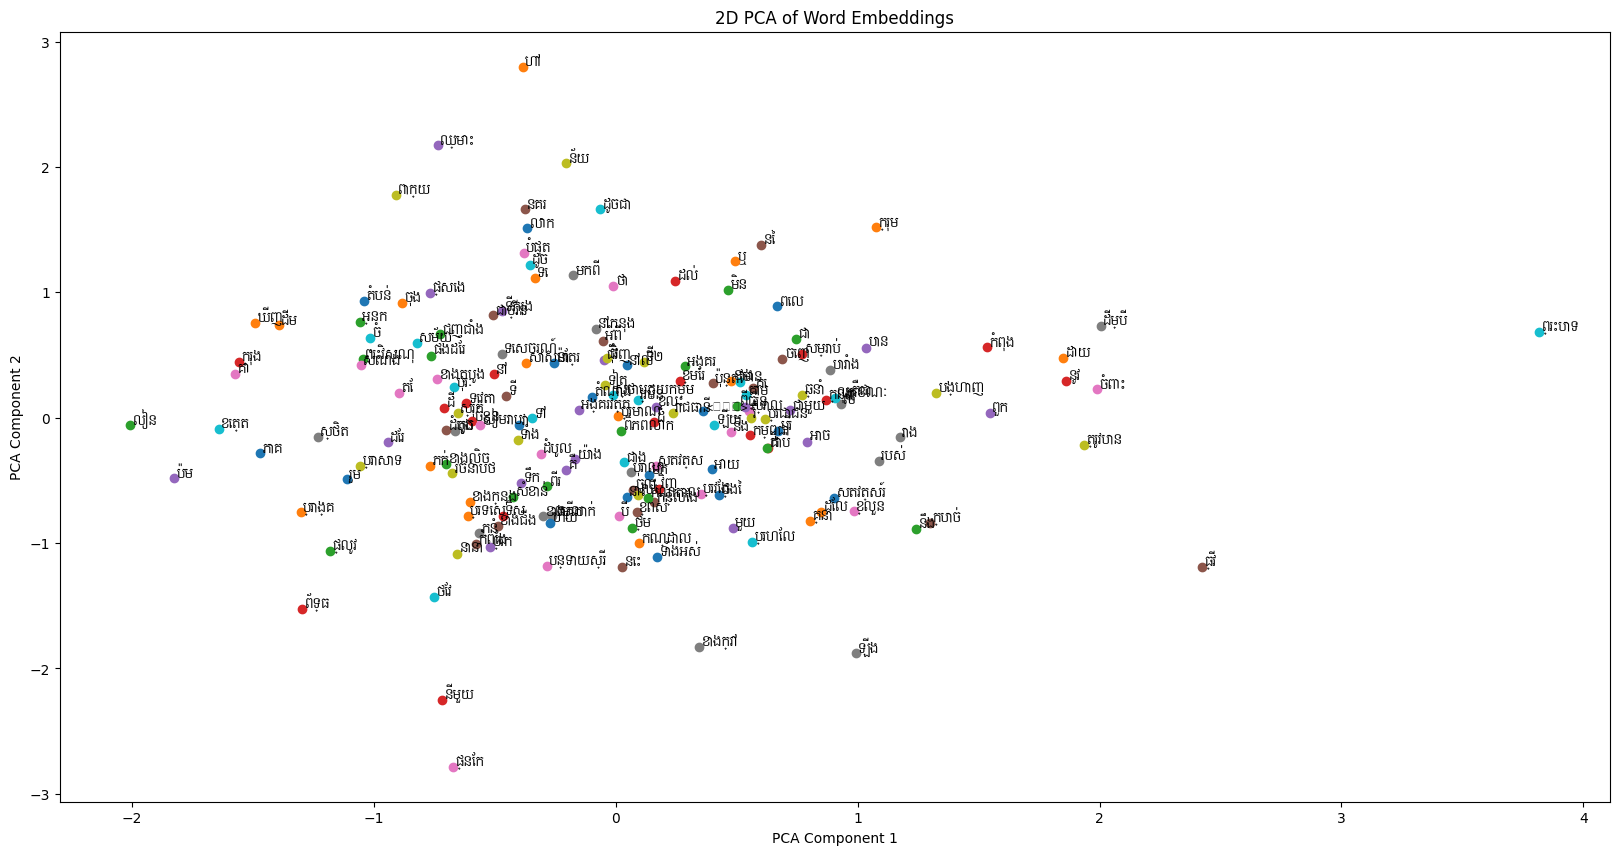

In [30]:
import pathlib

plt.figure(figsize=(20, 10))
for i, embedding in enumerate(reduced_embeddings):
    word = index_to_word[i]
    x, y = embedding
    plt.scatter(x, y)
    plt.text(x + 0.01, y + 0.01, word, fontsize=9, font=pathlib.Path('KhmerOSContent-Regular.ttf'))

plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('2D PCA of Word Embeddings')
plt.show()